In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df1 = df.copy()
df1.drop(['class', 'embark_town', 'alive'], axis=1, inplace=True)
df1.deck = df1.deck.astype('O')
df1.deck.fillna('N', inplace=True)
df1.embarked.fillna('S', inplace=True)

In [4]:
le_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
le_columns

Index(['sex', 'embarked', 'who', 'adult_male', 'deck', 'alone'], dtype='object')

In [5]:
for i in le_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])

In [7]:
train = df1[df1.age.notnull()]
test = df1[df1.age.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
5,0,3,1,NaN,0,0,8.4583,1,1,1,7,1
17,1,2,1,NaN,0,0,13.0000,2,1,1,7,1
19,1,3,0,NaN,0,0,7.2250,0,2,0,7,1
26,0,3,1,NaN,0,0,7.2250,0,1,1,7,1
28,1,3,0,NaN,0,0,7.8792,1,2,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,0,1,1,7,1
863,0,3,0,NaN,8,2,69.5500,2,2,0,7,0
868,0,3,1,NaN,0,0,9.5000,2,1,1,7,1
878,0,3,1,NaN,0,0,7.8958,2,1,1,7,1


In [8]:
X_train = train.drop('age', axis=1)
y_train = train.age
X_test = test.drop('age', axis=1)

In [ ]:
dtreg = DecisionTreeRegressor(ccp_alpha=0.95, max_depth=3) # "mse", "friedman_mse", "mae"
dtreg.fit(X_train, y_train)

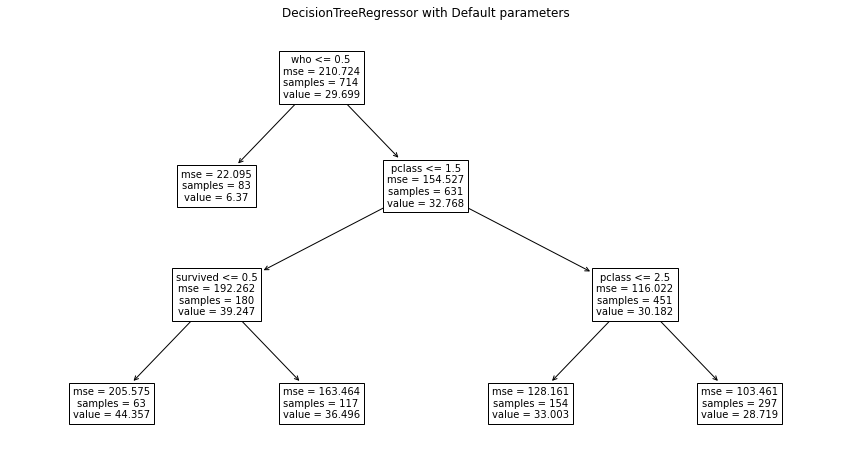

In [28]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

plot_tree(dtreg, feature_names=X_train.columns, fontsize=10, ax=ax1)
ax1.set_title('DecisionTreeRegressor with Default parameters')
plt.show()

In [18]:
dtreg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [29]:
test.age = dtreg.predict(X_test)
test.age

5      28.718855
17     33.003247
19     28.718855
26     28.718855
28     28.718855
         ...    
859    28.718855
863    28.718855
868    28.718855
878    28.718855
888    28.718855
Name: age, Length: 177, dtype: float64

In [32]:
age_pred = dtreg.predict(X_train)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, age_pred)

118.17203965977987

## Trade-off

Feature importanes:
[0.038 0.188 0.    0.    0.    0.    0.    0.774 0.    0.    0.   ]
survived : 0.038
pclass : 0.188
sex : 0.000
sibsp : 0.000
parch : 0.000
fare : 0.000
embarked : 0.000
who : 0.774
adult_male : 0.000
deck : 0.000
alone : 0.000


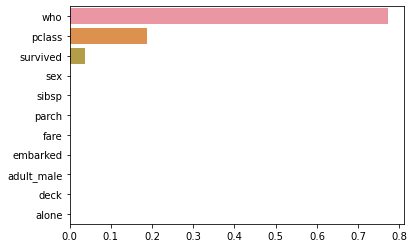

In [36]:
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# feature importance 추출
print("Feature importanes:\n{0}".format(np.round(dtreg.feature_importances_, 3)))

# feature별 importance 매핑
f_i1 = {}
f_i2 = {}

for name, value in zip(X_train.columns, dtreg.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    f_i1[name] = value

result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)

for i, j in result1:
    f_i2[i] = j
    
# feature importance를 column 별로 시각화하기
sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()))
plt.show()